In [16]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('Test_data.csv')
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
x_train = train_data.drop("class", axis=1)
y_train = train_data['class']

x_test = test_data

In [ ]:
label = LabelEncoder()
y_train = label.fit_transform(y_train)

In [ ]:
x_train_encoded = pd.get_dummies(x_train)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(x_train_split, y_train_split)

y_val_pred = svm.predict(x_val_split)

print("Validation Accuracy:", accuracy_score(y_val_split, y_val_pred))
print("Classification Report:\n", classification_report(y_val_split, y_val_pred))

Validation Accuracy: 0.9888866838658464
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2365
           1       0.99      0.99      0.99      2674

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039



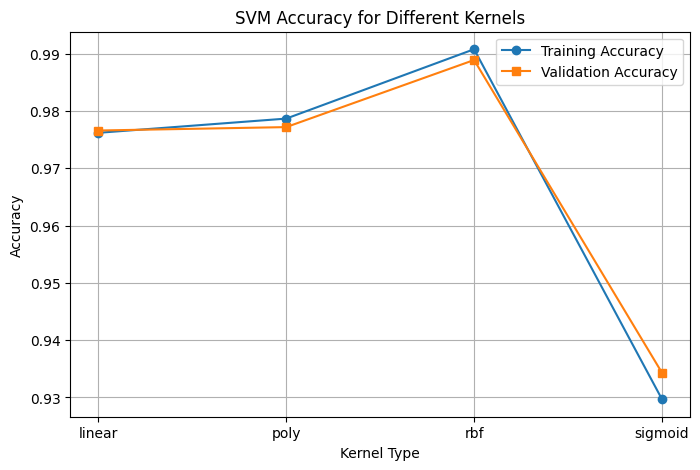

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
train_accuracies = []
val_accuracies = []

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train_split, y_train_split)

    train_acc = accuracy_score(y_train_split, model.predict(x_train_split))
    val_acc = accuracy_score(y_val_split, model.predict(x_val_split))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(kernels, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(kernels, val_accuracies, marker='s', label='Validation Accuracy')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
parameter_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

In [ ]:
grid = GridSearchCV(SVC(), parameter_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(x_train_split, y_train_split)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=1)

In [15]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_val_split)

# Evaluate
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_val_split, y_pred))

Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9910186624380654
Test Accuracy: 0.9908712046040881


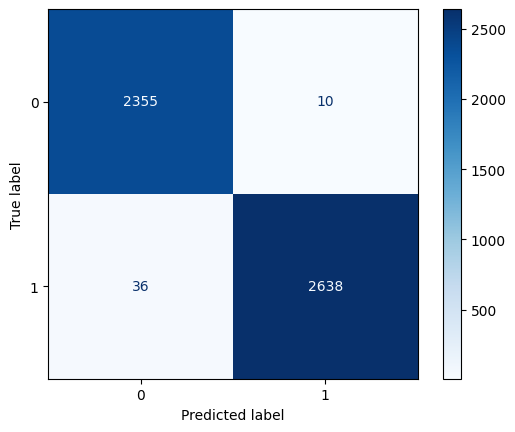

In [17]:
cm = confusion_matrix(y_val_split, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')